# 인접 공원 거리 기반
- distance_matrix 이용


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# pip install scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
  fm.fontManager.addfont(font_file)

#plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [4]:
from scipy.spatial import distance_matrix

In [6]:
park = pd.read_csv('../etl/etl_files/Gwanak.csv', encoding="cp949")
park.head()

,번호,명칭,위치,동이름,위도,경도,설치기구종류,운동기구 총계,담당부서,데이터기준일
0,1,도림천,신림동 808-126 ~ 구로교(구로디지털단지역) (관악구 6.7km 관리),대학동,37.459221,126.947436,"워킹머신 (4개),롤링웨이스트 (3개),허리돌리기 (2개),크로스컨트리 (5개),트...",45,치수과,#######
1,2,관악산 야외식물원,신림동 205-1,대학동,37.461175,126.948224,"등허리운동,뱃살운동,다리운동,허리운동,노젓기운동,괄약근운동,양다리운동,옆회전운동,평행봉",9,공원녹지과,#######
2,3,관악산 샘말공원,서울특별시 관악구 신림동 신림로,신림동,37.464900,126.938487,"양다리운동,옆회전운동,원그리기운동,허리운동,노젓기운동,마라톤운동,팔올리기운동,하체단...",11,공원녹지과,#######
3,4,맨발공원,신림동 산 27-5,대학동,37.466530,126.944351,"원그리기운동,팔내리기운동,옆회전운동,허리돌리기,역기,윗몸일으키기,평행봉, 철봉,달리...",14,공원녹지과,#######
4,5,제2구민운동장,신림동 58-8,신림동,37.458192,126.933654,"원그리기운동,허리운동,옆회전운동,양다리운동,팔올리기운동,노젓기운동,뱃살운동",7,공원녹지과,#######


In [8]:
park_position = park[['명칭','위도','경도']].set_index('명칭')
# park_position['위도'] = park_position['위도'].apply(lambda x: int(x[3:].replace(',','')))
# park_position['경도'] = park_position['경도'].apply(lambda x: int(x[5:].replace(',','')))
park_position

,위도,경도
명칭,,
도림천,37.459221,126.947436
관악산 야외식물원,37.461175,126.948224
관악산 샘말공원,37.464900,126.938487
맨발공원,37.466530,126.944351
제2구민운동장,37.458192,126.933654
...,...,...
까치 어린이공원,37.479943,126.959598
장미 어린이공원,37.479071,126.962367
모래내 어린이공원,37.477801,126.955581


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


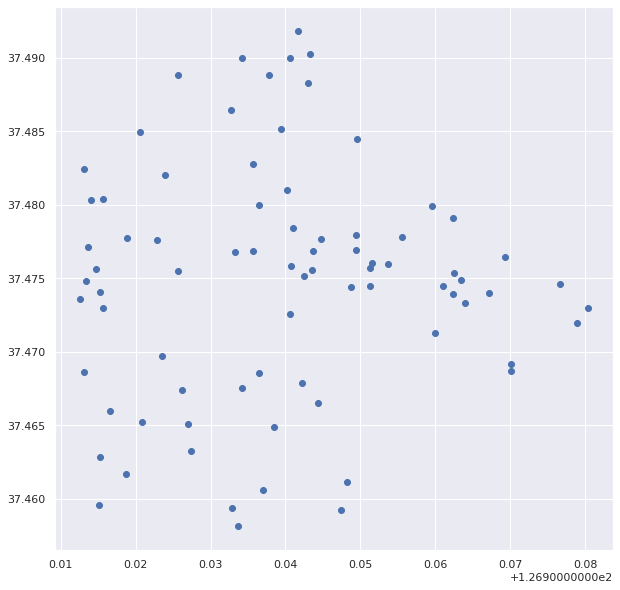

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(data=park_position, x='경도',y='위도')
plt.show()

In [10]:
np.array(park_position)

array([[ 37.45922056, 126.9474365 ],
       [ 37.46117532, 126.948224  ],
       [ 37.46490032, 126.9384872 ],
       [ 37.46653022, 126.9443508 ],
       [ 37.4581916 , 126.9336538 ],
       [ 37.4632424 , 126.9274051 ],
       [ 37.46918723, 126.9701342 ],
       [ 37.46869887, 126.9700973 ],
       [ 37.46740181, 126.9261447 ],
       [ 37.46863639, 126.9130713 ],
       [ 37.46062333, 126.9370334 ],
       [ 37.47758421, 126.9228109 ],
       [ 37.47776267, 126.9187994 ],
       [ 37.45955849, 126.915074  ],
       [ 37.46167895, 126.9187599 ],
       [ 37.46599772, 126.9165434 ],
       [ 37.47603303, 126.9515569 ],
       [ 37.47440298, 126.9488145 ],
       [ 37.47573021, 126.9512288 ],
       [ 37.47450525, 126.9513428 ],
       [ 37.47693209, 126.9494369 ],
       [ 37.4712795 , 126.9600007 ],
       [ 37.4729817 , 126.9157077 ],
       [ 37.46525175, 126.9208607 ],
       [ 37.48037476, 126.9156515 ],
       [ 37.4764527 , 126.9693215 ],
       [ 37.47998945, 126.9364413 ],
 

['도림천',
 '관악산 야외식물원',
 '관악산 샘말공원',
 '맨발공원',
 '제2구민운동장',
 '신림2-1배수지',
 '봉천11배수지공원(놀이터부근)',
 '봉천11배수지공원(배드민턴장부근)',
 '신림6배수지공원',
 '선우공원',
 '고시공원',
 '난우공원',
 '미성체육관 부근',
 '난향동 서울숲요양원 뒤',
 '난향동 주민쉼터',
 '난향공원',
 '청룡산공원(배드민턴장 옆)',
 '청룡산공원(유아숲체험장윈)',
 '청룡산입구(청룡초 뒤)',
 '청룡산공원(관악경찰서 옆)',
 '청룡산공원(텃밭공원)',
 '낙성대공원(구민체육센터 일대)',
 '근린8지구',
 '근린19지구',
 '신림 근린공원',
 '까치산 근린공원',
 '장군봉 근린공원',
 '상도 근린공원',
 '약수 어린이공원',
 '대협 어린이공원',
 '난우 어린이공원',
 '난곡 어린이공원',
 '한라 어린이공원',
 '신라 어린이공원',
 '합실 어린이공원',
 '약수암 어린이공원',
 '사우촌 어린이공원',
 '목화 어린이공원',
 '태양 어린이공원',
 '새숲 어린이공원',
 '미도 어린이공원',
 '색동 어린이공원',
 '새들 어린이공원',
 '남부 어린이공원',
 '일선 어린이공원',
 '봉림 어린이공원',
 '호박골 어린이공원',
 '무궁화 어린이공원',
 '보명 어린이공원',
 '쑥고개 어린이공원',
 '신화 어린이공원',
 '해태 어린이공원',
 '서광 어린이공원',
 '서원 어린이공원',
 '상록 어린이공원',
 '예촌 어린이공원',
 '군아파트 어린이공원',
 '교체 어린이공원',
 '밤골 어린이공원',
 '인헌 어린이공원',
 '원당 어린이공원',
 '새싹 어린이공원',
 '미성동 소공원',
 '선봉 어린이공원',
 '은천 어린이공원',
 '국회단지 어린이공원',
 '국지 어린이공원',
 '국사봉 어린이공원',
 '학다리 어린이공원',
 '청룡 어린이공원',
 '비안 어린이공원',
 '용담 어린이공원',
 '영락 어린이공원',
 '으뜸 어린이공원',
 '까치 

In [40]:
park_name = list(park_position.index)
# print(park_name)
near_park = {}

for ind in park_position.index:
  dist = distance_matrix([[ park_position.loc[ind]['위도'],park_position.loc[ind]['경도'] ]],np.array(park_position))
  # print(dist)
  dist_sorted = np.sort(dist)[0][:5]
  print(dist_sorted)
  park_index = [np.where(dist == dist_sorted[i])[1] for i in range(1,5)]
  near_park[ind] = [park_name[i_arr[0]] for i_arr in park_index]
  
pd.DataFrame.from_dict(near_park, orient='index')

[0.         0.00210743 0.00793427 0.01010404 0.01049725]
[0.         0.00210743 0.00660883 0.00898876 0.01042501]
[0.         0.00418947 0.00451732 0.00480801 0.00507147]
[0.         0.00250308 0.00608592 0.00660883 0.00712069]
[0.         0.00137999 0.00416353 0.00803473 0.00826854]
[0.         0.00191949 0.00434618 0.00674487 0.00684592]
[0.         0.00048975 0.00563769 0.00731078 0.0073692 ]
[0.         0.00048975 0.00604501 0.00762371 0.00779254]
[0.         0.0024382  0.00349726 0.00434618 0.00570468]
[0.         0.00436097 0.00498838 0.00508255 0.00587509]
[0.         0.00416353 0.00430134 0.00451732 0.00748775]
[0.         0.00350148 0.00401547 0.00460855 0.00768402]
[0.         0.00401547 0.00409051 0.00463828 0.00509765]
[0.         0.00331741 0.00425232 0.00660476 0.00811783]
[0.         0.00371112 0.00414467 0.00425232 0.00485434]
[0.         0.00338494 0.00436097 0.00438127 0.00485434]
[0.         0.00044649 0.00154271 0.00211309 0.00230276]
[0.         0.00253037 0.002604

,0,1,2,3
도림천,관악산 야외식물원,맨발공원,목화 어린이공원,고시공원
관악산 야외식물원,도림천,맨발공원,목화 어린이공원,관악산 샘말공원
관악산 샘말공원,태양 어린이공원,고시공원,목화 어린이공원,사우촌 어린이공원
맨발공원,목화 어린이공원,관악산 샘말공원,관악산 야외식물원,해태 어린이공원
제2구민운동장,약수암 어린이공원,고시공원,신림2-1배수지,관악산 샘말공원
...,...,...,...,...
까치 어린이공원,장미 어린이공원,모래내 어린이공원,인헌 어린이공원,탑골 어린이공원
장미 어린이공원,까치 어린이공원,인헌 어린이공원,원당 어린이공원,탑골 어린이공원
모래내 어린이공원,백설 어린이공원,청룡산공원(배드민턴장 옆),까치 어린이공원,청룡산입구(청룡초 뒤)
백설 어린이공원,청룡산공원(배드민턴장 옆),청룡산입구(청룡초 뒤),모래내 어린이공원,청룡산공원(관악경찰서 옆)
